In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_train.shape[0]

60000

input data에 존재하는 하나의 이미지의 shape을 변경해줘야 한다. (28x28) => (28x28x1)<br>

In [5]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [6]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [7]:
x_train[0].shape

(28, 28, 1)

In [8]:
x_train = x_train/255 # 0 ~ 1 사이의 값으로 정규화 하기
x_test = x_test/255

In [9]:
y_train[0]

5

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [11]:
model = Sequential()

In [12]:
model.add(Conv2D(32, kernel_size=(3, 3),
                 strides=(1,1),
                 activation='relu',
                 input_shape=x_train[0].shape))

Conv2D에 대한 자세한 내용은 https://keras.io/layers/convolutional/ 참고 
또는 https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D

In [13]:
# 2x2 크기의 filter를 사용해서 Max pooling 수행
model.add(MaxPooling2D(pool_size=(2, 2)))
# strides의 기본값 => pool_size

다시 한번 Conv2D와 MaxPooling2D를 적용합니다.

In [14]:
model.add(Conv2D(32, kernel_size=(3, 3),
                 strides=(1,1),
                 activation='relu'))

In [15]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [16]:
model.add(Flatten())

Flatten()은 3차원 형태의 데이터를 1차원 형태로 변경하는 작업을 수행

In [17]:
model.add(Dense(64, activation='relu'))

In [18]:
model.add(Dense(10, activation = 'softmax'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 64)                5

In [20]:
from tensorflow.keras import optimizers
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
               loss='categorical_crossentropy',
               metrics=['categorical_accuracy'])
# 아래와 동일
# model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
#                loss=tf.keras.losses.CategoricalCrossentropy(),
#                metrics=[tf.keras.metrics.CategoricalAccuracy()])

In [21]:
from tensorflow.keras.utils import to_categorical 
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [22]:
import matplotlib.pyplot as plt

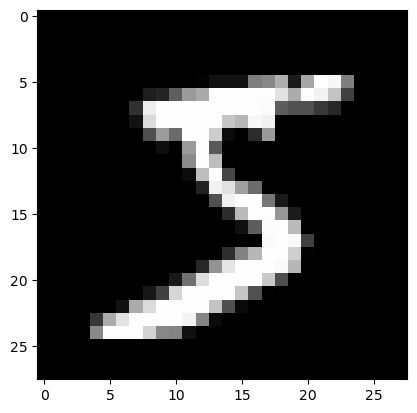

In [23]:
plt.imshow(x_train[0], cmap='gray')
plt.show()

In [24]:
print(y_train[0])
y_train_one_hot[0]

5


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [25]:
history = model.fit(x_train, y_train_one_hot, epochs=20, batch_size=128, validation_split=0.1)

Epoch 1/20
422/422 [==============================] - 9s 20ms/step - loss: 0.2651 - categorical_accuracy: 0.9205 - val_loss: 0.0898 - val_categorical_accuracy: 0.9742
Epoch 2/20
422/422 [==============================] - 8s 20ms/step - loss: 0.0753 - categorical_accuracy: 0.9773 - val_loss: 0.0536 - val_categorical_accuracy: 0.9855
Epoch 3/20
422/422 [==============================] - 8s 20ms/step - loss: 0.0525 - categorical_accuracy: 0.9837 - val_loss: 0.0451 - val_categorical_accuracy: 0.9882
Epoch 4/20
422/422 [==============================] - 8s 20ms/step - loss: 0.0393 - categorical_accuracy: 0.9876 - val_loss: 0.0495 - val_categorical_accuracy: 0.9852
Epoch 5/20
422/422 [==============================] - 9s 20ms/step - loss: 0.0318 - categorical_accuracy: 0.9903 - val_loss: 0.0357 - val_categorical_accuracy: 0.9898
Epoch 6/20
422/422 [==============================] - 9s 20ms/step - loss: 0.0262 - categorical_accuracy: 0.9919 - val_loss: 0.0393 - val_categorical_accuracy: 0.989

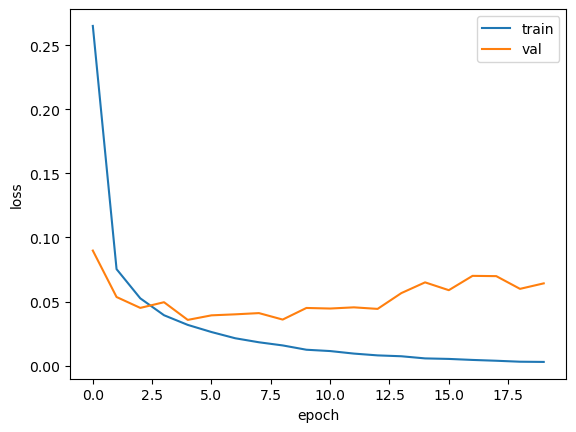

In [26]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

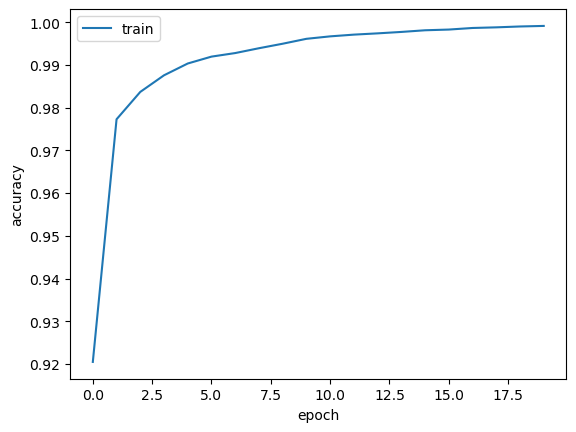

In [27]:
plt.plot(history.history['categorical_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train'])
plt.show()

In [28]:
test_loss, test_acc = model.evaluate(x_test, y_test_one_hot)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0494 - categorical_accuracy: 0.9904
test_acc: 0.9904000163078308


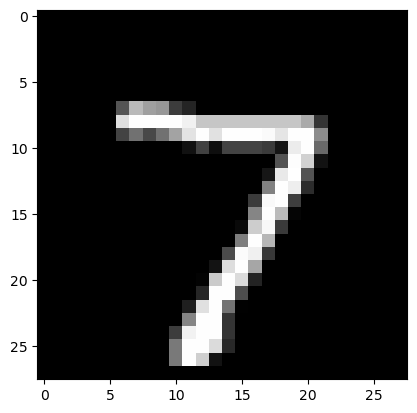

In [29]:
plt.imshow(x_test[0], cmap='gray')
plt.show()

In [30]:
import numpy as np
np.set_printoptions(suppress=True, precision=10)
prediction = model.predict(x_test[0:1]) # 첫번째 이미지 in the test dataset

1/1 [==============================] - 0s 71ms/step


In [31]:
prediction

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [32]:
y_test[0]

7

In [33]:
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [34]:
print(labels[np.argmax(prediction)])

7


In [35]:
range(0,10)[0]

0